## Does Sinning Payoff?

### An analysis on the VICE ETF vs ESG ETFs

This analysis looks at the performance of the VICE ETF, two ESG ETFs, and the Fidelity 500 Index Fund (FXIAX). Performance is assessed in terms of the Fama-French Three Factor Model.

ESG funds invest ethically and responsibly, and specifically consider environmental, social, and governance factors.

The AdvisorShares VICE ETF invests in industries considered unethical, including (but not limited to) the following industries:
* Tobacco
* Alcohol
* Gambling
* Adult Entertainment
* Weapons

The following two ESG ETFs are included in the analysis:
* Vanguard ESG U.S. Stock ETF (ESGV)
* 1919 Socially Responsive Balanced Fund (SSIAX)

The FXIAX fund attempts to mirror the S&P 500, and does not have ESG fund attributes - nor is its focus to replicate sin stocks. This is included as a base to compare the VICE and ESG ETFs against.

The three-year period from 1 November 2018 to 1 November 2021 is included as the observed period.

### ETF Data Collection and Processing
This section deals with the collection and processing of data with respect to the aforementioned funds.
Data is collected from Yahoo Finance via the yfinance api library, manipulated, and cleaned.

In [220]:
# Importing relevant libraries to use during processing and analysis
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
import seaborn as sns
import warnings
from scipy import stats
warnings.simplefilter(action='ignore',category=FutureWarning)

In [221]:
# Retrieving the price histories for the aforementioned ETFs and funds.
tickers = yf.Tickers(['VICE', 'ESGV', 'SSIAX', 'FXAIX'])
phist = tickers.history(interval="1d", start="2017-10-31", end="2021-10-31")
phist


[*********************100%***********************]  4 of 4 completed


Close                                   Dividends              \
                 ESGV       FXAIX      SSIAX       VICE      ESGV FXAIX SSIAX   
Date                                                                            
2017-10-30        NaN   83.041115  16.204685        NaN       NaN   0.0   0.0   
2017-10-31        NaN   83.124123  16.213449        NaN       NaN   0.0   0.0   
2017-11-01        NaN   83.253235  16.239742        NaN       NaN   0.0   0.0   
2017-11-02        NaN   83.280907  16.274797        NaN       NaN   0.0   0.0   
2017-11-03        NaN   83.548378  16.327379        NaN       NaN   0.0   0.0   
...               ...         ...        ...        ...       ...   ...   ...   
2021-10-25  84.949997  158.529999  28.209999  33.654999       0.0   0.0   0.0   
2021-10-26  85.000000  158.809998  28.260000  33.584000       0.0   0.0   0.0   
2021-10-27  84.559998  158.009995  28.270000  33.158001       0.0   0.0   0.0   
2021-10-28  85.540001  159.580002  28.440001  33.140999       0.0   0.0   0.0   
2021-10-29  85.730003  159.899994  28.549999  32.904999       0.0   0.0   0.0   

                      High              ...       Open             \
           VICE       ESGV       FXAIX  ...      SSIAX       VICE   
Date                                    ...                         
2017-10-30  NaN        NaN   83.041115  ...  16.204685        NaN   
2017-10-31  NaN        NaN   83.124123  ...  16.213449        NaN   
2017-11-01  NaN        NaN   83.253235  ...  16.239742        NaN   
2017-11-02  NaN        NaN   83.280907  ...  16.274797        NaN   
2017-11-03  NaN        NaN   83.548378  ...  16.327379        NaN   
...         ...        ...         ...  ...        ...        ...   
2021-10-25  0.0  85.050003  158.529999  ...  28.209999  33.660000   
2021-10-26  0.0  85.540001  158.809998  ...  28.260000  33.880001   
2021-10-27  0.0  85.279999  158.009995  ...  28.270000  33.730000   
2021-10-28  0.0  85.550003  159.580002  ...  28.440001  33.088001   
2021-10-29  0.0  85.809998  159.899994  ...  28.549999  33.000000   

           Stock Splits                     Volume                      
                   ESGV FXAIX SSIAX VICE      ESGV FXAIX SSIAX    VICE  
Date                                                                    
2017-10-30          NaN     0     0  NaN       NaN     0     0     NaN  
2017-10-31          NaN     0     0  NaN       NaN     0     0     NaN  
2017-11-01          NaN     0     0  NaN       NaN     0     0     NaN  
2017-11-02          NaN     0     0  NaN       NaN     0     0     NaN  
2017-11-03          NaN     0     0  NaN       NaN     0     0     NaN  
...                 ...   ...   ...  ...       ...   ...   ...     ...  
2021-10-25          0.0     0     0  0.0  205500.0     0     0   800.0  
2021-10-26          0.0     0     0  0.0  198500.0     0     0  1100.0  
2021-10-27          0.0     0     0  0.0  117800.0     0     0   400.0  
2021-10-28          0.0     0     0  0.0  316600.0     0     0   800.0  
2021-10-29          0.0     0     0  0.0  169600.0     0     0   900.0  

[1008 rows x 28 columns]

In [222]:
# Dropping unneeded columns and removing NaN data
phist.drop(['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'], axis=1, inplace=True)
phist.dropna(inplace=True)

In [223]:
phist.index = pd.to_datetime(phist.index)
phist

Close                                  
                 ESGV       FXAIX      SSIAX       VICE
Date                                                   
2018-09-20  48.654594   96.279373  18.269062  25.873234
2018-09-21  48.567871   96.251266  18.241180  25.627680
2018-09-24  48.413689   95.914200  18.194723  25.588806
2018-09-25  48.423328   95.792465  18.185431  25.553726
2018-09-26  48.201687   95.474136  18.138971  25.598288
...               ...         ...        ...        ...
2021-10-25  84.949997  158.529999  28.209999  33.654999
2021-10-26  85.000000  158.809998  28.260000  33.584000
2021-10-27  84.559998  158.009995  28.270000  33.158001
2021-10-28  85.540001  159.580002  28.440001  33.140999
2021-10-29  85.730003  159.899994  28.549999  32.904999

[784 rows x 4 columns]

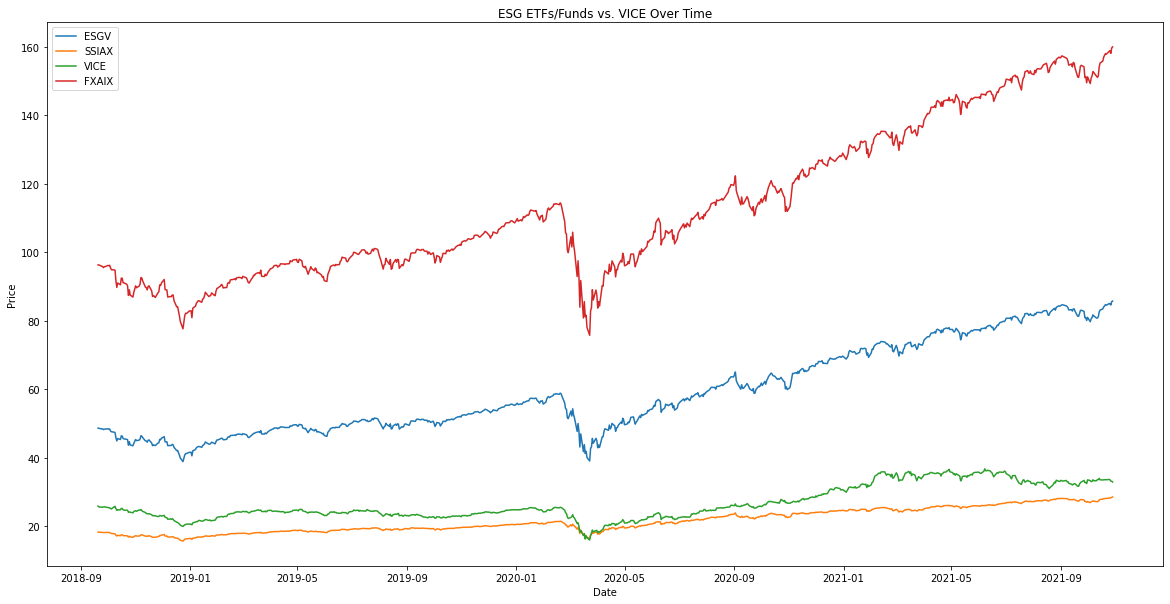

In [224]:
# Visualizing Price History for the four ETFs
plt.figure(figsize=(20,10))
plt.plot(phist["Close","ESGV"], label="ESGV")
plt.plot(phist["Close","SSIAX"], label="SSIAX")
plt.plot(phist["Close","VICE"], label="VICE")
plt.plot(phist["Close","FXAIX"], label="FXAIX")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("ESG ETFs/Funds vs. VICE Over Time")
plt.legend(loc="upper left")

In [225]:
# Computing the daily returns (rate of change of daily close prices)
ret = phist.pct_change(axis=0)
ret.dropna(inplace=True)
ret = ret.droplevel(0, axis=1)
ret

,ESGV,FXAIX,SSIAX,VICE
Date,,,,
2018-09-21,-0.001782,-0.000292,-0.001526,-0.009491
2018-09-24,-0.003175,-0.003502,-0.002547,-0.001517
2018-09-25,0.000199,-0.001269,-0.000511,-0.001371
2018-09-26,-0.004577,-0.003323,-0.002555,0.001744
2018-09-27,0.002999,0.002942,0.001537,0.002963
...,...,...,...,...
2021-10-25,0.005206,0.004753,0.003201,0.003010
2021-10-26,0.000589,0.001766,0.001772,-0.002110
2021-10-27,-0.005176,-0.005037,0.000354,-0.012685


In [226]:
# Including all data from 31 OCTOBER 2018 Only
start = '2018-10-31'
mask = (ret.index > start)
ret1 = ret.loc[mask]
ret1

,ESGV,FXAIX,SSIAX,VICE
Date,,,,
2018-11-01,0.012271,0.010542,0.010349,0.005243
2018-11-02,-0.007231,-0.006155,-0.007008,-0.007032
2018-11-05,0.003214,0.005563,0.000000,0.016148
2018-11-06,0.006620,0.006367,0.004886,-0.003638
2018-11-07,0.022274,0.021263,0.016207,0.008647
...,...,...,...,...
2021-10-25,0.005206,0.004753,0.003201,0.003010
2021-10-26,0.000589,0.001766,0.001772,-0.002110
2021-10-27,-0.005176,-0.005037,0.000354,-0.012685


### Processing Fama-French Factors
Fama-French factors are retrieved from Kenneth French's data library (https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html).

These factors include the market risk premium ($MRP$), value premium ($HML$), and size premium ($SMB$).

In [227]:
#Load in the factors from the CSV file 
ff3 = pd.read_csv('factors.csv',skiprows=4)
ff3

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.23,-0.28,0.009
1,19260702,0.45,-0.34,-0.03,0.009
2,19260706,0.17,0.29,-0.38,0.009
3,19260707,0.09,-0.59,0.00,0.009
4,19260708,0.21,-0.38,0.18,0.009
...,...,...,...,...,...
25101,20211026,0.04,-0.71,-0.32,0.000
25102,20211027,-0.76,-0.74,-1.19,0.000
25103,20211028,1.14,0.87,-0.47,0.000
25104,20211029,0.22,0.19,-0.82,0.000


In [228]:
# Renaming the date column and removing the last row (unnecessary data)
ff3.rename(columns={'Unnamed: 0':'Date'}, inplace=True)
ff3.drop(ff3.index[25105], inplace=True)
ff3

,Date,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.23,-0.28,0.009
1,19260702,0.45,-0.34,-0.03,0.009
2,19260706,0.17,0.29,-0.38,0.009
3,19260707,0.09,-0.59,0.00,0.009
4,19260708,0.21,-0.38,0.18,0.009
...,...,...,...,...,...
25100,20211025,0.58,0.49,-0.16,0.000
25101,20211026,0.04,-0.71,-0.32,0.000
25102,20211027,-0.76,-0.74,-1.19,0.000
25103,20211028,1.14,0.87,-0.47,0.000


In [229]:
# Convert the Date column to Datetime Format and setting it as the index
ff3['Date'] = pd.to_datetime(ff3['Date'])
ff3.set_index('Date', inplace=True)
ff3

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.10,-0.23,-0.28,0.009
1926-07-02,0.45,-0.34,-0.03,0.009
1926-07-06,0.17,0.29,-0.38,0.009
1926-07-07,0.09,-0.59,0.00,0.009
1926-07-08,0.21,-0.38,0.18,0.009
...,...,...,...,...
2021-10-25,0.58,0.49,-0.16,0.000
2021-10-26,0.04,-0.71,-0.32,0.000
2021-10-27,-0.76,-0.74,-1.19,0.000


In [230]:
# Include dates from 31 OCTOBER 2018 onward, to match the ETF returns dataset
start = '2018-10-31'
mask = (ff3.index > start)
ff3 = ff3.loc[mask]
ff3

,Mkt-RF,SMB,HML,RF
Date,,,,
2018-11-01,1.29,1.36,-1.14,0.008
2018-11-02,-0.53,0.79,0.67,0.008
2018-11-05,0.40,-1.01,1.56,0.008
2018-11-06,0.58,-0.15,0.02,0.008
2018-11-07,2.11,-0.35,-1.06,0.008
...,...,...,...,...
2021-10-25,0.58,0.49,-0.16,0.000
2021-10-26,0.04,-0.71,-0.32,0.000
2021-10-27,-0.76,-0.74,-1.19,0.000


In [231]:
# Scale factors - divide by 100 to match scale of ETFs
ff3 = ff3/100

In [232]:
# Merge the ETF returns data and the Fama French factors
ret_ff3 = pd.merge(ret1,ff3,how='inner',left_index=True, right_index=True)
ret_ff3

,ESGV,FXAIX,SSIAX,VICE,Mkt-RF,SMB,HML,RF
Date,,,,,,,,
2018-11-01,0.012271,0.010542,0.010349,0.005243,0.0129,0.0136,-0.0114,0.00008
2018-11-02,-0.007231,-0.006155,-0.007008,-0.007032,-0.0053,0.0079,0.0067,0.00008
2018-11-05,0.003214,0.005563,0.000000,0.016148,0.0040,-0.0101,0.0156,0.00008
2018-11-06,0.006620,0.006367,0.004886,-0.003638,0.0058,-0.0015,0.0002,0.00008
2018-11-07,0.022274,0.021263,0.016207,0.008647,0.0211,-0.0035,-0.0106,0.00008
...,...,...,...,...,...,...,...,...
2021-10-25,0.005206,0.004753,0.003201,0.003010,0.0058,0.0049,-0.0016,0.00000
2021-10-26,0.000589,0.001766,0.001772,-0.002110,0.0004,-0.0071,-0.0032,0.00000
2021-10-27,-0.005176,-0.005037,0.000354,-0.012685,-0.0076,-0.0074,-0.0119,0.00000


In [233]:
# Calculate the Excess Return of Each ETF (in excess of RF)
ret_ff3['ESGV_DIFF'] = ret_ff3['ESGV']-ret_ff3['RF']
ret_ff3['FXAIX_DIFF'] = ret_ff3['FXAIX']-ret_ff3['RF']
ret_ff3['SSIAX_DIFF'] = ret_ff3['SSIAX']-ret_ff3['RF']
ret_ff3['VICE_DIFF'] = ret_ff3['VICE']-ret_ff3['RF']
ret_ff3

,ESGV,FXAIX,SSIAX,VICE,Mkt-RF,SMB,HML,RF,ESGV_DIFF,FXAIX_DIFF,SSIAX_DIFF,VICE_DIFF
Date,,,,,,,,,,,,
2018-11-01,0.012271,0.010542,0.010349,0.005243,0.0129,0.0136,-0.0114,0.00008,0.012191,0.010462,0.010269,0.005163
2018-11-02,-0.007231,-0.006155,-0.007008,-0.007032,-0.0053,0.0079,0.0067,0.00008,-0.007311,-0.006235,-0.007088,-0.007112
2018-11-05,0.003214,0.005563,0.000000,0.016148,0.0040,-0.0101,0.0156,0.00008,0.003134,0.005483,-0.000080,0.016068
2018-11-06,0.006620,0.006367,0.004886,-0.003638,0.0058,-0.0015,0.0002,0.00008,0.006540,0.006287,0.004806,-0.003718
2018-11-07,0.022274,0.021263,0.016207,0.008647,0.0211,-0.0035,-0.0106,0.00008,0.022194,0.021183,0.016127,0.008567
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25,0.005206,0.004753,0.003201,0.003010,0.0058,0.0049,-0.0016,0.00000,0.005206,0.004753,0.003201,0.003010
2021-10-26,0.000589,0.001766,0.001772,-0.002110,0.0004,-0.0071,-0.0032,0.00000,0.000589,0.001766,0.001772,-0.002110
2021-10-27,-0.005176,-0.005037,0.000354,-0.012685,-0.0076,-0.0074,-0.0119,0.00000,-0.005176,-0.005037,0.000354,-0.012685


## Fama French Three Factor Models

This section contains regression analyses to assess the performance of each selected ETF/fund.

The performance of each ETF/fund is modelled on the Fama French Three Factor model, where a dependent variable (the ETF or fund's returns) are regressed on three factors included as independent variables. These independent variables are:
* Market Risk Premium ($MRP$)
    - $MRP = R_{market}-RF$
* Size Premium (SMB)
* value Premium (HML)

The general model for the analyses in this section is as follows:
$$
\hat{ETF}=\hat{\alpha} + \hat{\beta_0}(MRP) + \hat{\beta_1}(SMB) + \hat{\beta_2}(HML)
$$

This model allows us to see the respective fund/ETF's performance relative to the market, size premium, and value premium factors. If a firm generates a return in excess of these factors, it's alpha (or regression constant) will be statistically different from zero.

### VICE Performance Model

The following se a regression of the VICE ETF excess returns (in excess of the risk-free rate) on three Fama French Factors (MRP, HML, SMB).

$$
\hat{VICE} = \hat{\alpha} + \hat{\beta_0}(MRP) + \hat{\beta_1}(SMB) + \hat{\beta_2}(HML)
$$

In [234]:
# VICE Regression
x = ret_ff3[['Mkt-RF','SMB', 'HML']]
y = ret_ff3['VICE_DIFF']
x = sm.add_constant(x)
est_vice = sm.OLS(y,x).fit()
est_vice.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              VICE_DIFF   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     709.9
Date:                Mon, 20 Dec 2021   Prob (F-statistic):          1.47e-218
Time:                        20:54:37   Log-Likelihood:                 2649.7
No. Observations:                 754   AIC:                            -5291.
Df Residuals:                     750   BIC:                            -5273.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -0.738      0.461      -0.001       0.000
Mkt-RF         0.7495      0.018     40.929      0.000       0.714       0.785
SMB            0.4590      0.036     12.698      0.000       0.388       0.530
HML            0.0648      0.023      2.837      0.005       0.020       0.110
==============================================================================
Omnibus:                       37.848   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.723
Skew:                           0.099   Prob(JB):                     4.51e-26
Kurtosis:                       4.917   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**VICE ETF Analysis Comments**:
* Alpha (const) is statistically insignificant (p=0.461)
* Positive market beta (0.7495) - statistically significant
    - Moves in the same direction as the market (moderately strong)
* Positive size premium coefficient - statistically significant
    - Positive movement with small cap stocks (moderately positive)
* Positive value premium coefficient  - statistically significant
    - Positive movement with value stocks (weakly positive)
* Acceptable DW - very low negative autocorrelation (DW=2.056, which is very close to 2)
* Normally distributed (JB p-value < 0.00)

### ESGV Performance Model
The following is a regression of the ESGV ETF excess returns (in excess of the risk-free rate) on three Fama French Factors (MRP, HML, SMB). 
$$
\hat{ESGV} = \hat{\alpha} + \hat{\beta_0}(MRP) + \hat{\beta_1}(SMB) + \hat{\beta_2}(HML)
$$

In [235]:
x = ret_ff3[['Mkt-RF','SMB', 'HML']]
y = ret_ff3['ESGV_DIFF']
x = sm.add_constant(x)
est_esgv = sm.OLS(y,x).fit()
est_esgv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ESGV_DIFF   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 4.167e+04
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:54:37   Log-Likelihood:                 4056.5
No. Observations:                 754   AIC:                            -8105.
Df Residuals:                     750   BIC:                            -8086.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         6.3e-05   4.08e-05      1.544      0.123   -1.71e-05       0.000
Mkt-RF         0.9906      0.003    349.504      0.000       0.985       0.996
SMB           -0.0357      0.006     -6.374      0.000      -0.047      -0.025
HML           -0.0425      0.004    -12.022      0.000      -0.049      -0.036
==============================================================================
Omnibus:                      179.436   Durbin-Watson:                   2.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4285.103
Skew:                          -0.446   Prob(JB):                         0.00
Kurtosis:                      14.645   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**ESGV ETF Analysis Comments**:
* Alpha (const) is statistically insignificant (p=0.123)
* Positive market beta (0.99) - statistically significant
    - Strong, positive movement with the market (nearly 1-for-1)
* Negative size premium coefficient - statistically significant
    - Positive movement with large cap stocks (negative movement with small caps)
* Positive value premium coefficient  - statistically significant
    - Positive movement with growth stocks (negative movement with value stocks)
* Acceptable DW - low levels of negative autocorrelation (DW=2.384, which is close to 2)
* Normally distributed (JB p-value = 0.00)

### SSIAX Performance Model
The following is a regression of the SSIAX ETF excess returns (in excess of the risk-free rate) on three Fama French Factors (MRP, HML, SMB). 
$$
\hat{SSIAX} = \hat{\alpha} + \hat{\beta_0}(MRP) + \hat{\beta_1}(SMB) + \hat{\beta_2}(HML)
$$

In [236]:
x = ret_ff3[['Mkt-RF','SMB', 'HML']]
y = ret_ff3['SSIAX_DIFF']
x = sm.add_constant(x)
est_ssiax = sm.OLS(y,x).fit()
est_ssiax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SSIAX_DIFF   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 1.168e+04
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:54:37   Log-Likelihood:                 3891.6
No. Observations:                 754   AIC:                            -7775.
Df Residuals:                     750   BIC:                            -7757.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.791e-05   5.08e-05      1.928      0.054   -1.79e-06       0.000
Mkt-RF         0.6575      0.004    186.419      0.000       0.651       0.664
SMB           -0.0575      0.007     -8.264      0.000      -0.071      -0.044
HML           -0.0867      0.004    -19.705      0.000      -0.095      -0.078
==============================================================================
Omnibus:                      178.795   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1498.409
Skew:                          -0.817   Prob(JB):                         0.00
Kurtosis:                       9.710   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**SSIAX ETF Analysis Comments**:
* Weak, positive alpha (statistically significant at 10% level, insig at lower levels)
* Positive market beta (0.66) - statistically significant
    - Moves in the same direction as the market (moderately strong)
* Negative size premium coefficient - statistically significant
    - Positive movement with large cap stocks (negative movement with small caps)
* Negative value premium coefficient - statistically significant
    - Negative movement with value stocks (positive movement with growth stocks)
* Acceptable DW - low levels of positive autocorrelation (DW=1.889, which is close to 2)
* Normally distributed (JB p-value = 0.00)

### FXAIX Performance Model
The following is a regression of the FXAIX ETF excess returns (in excess of the risk-free rate) on three Fama French Factors (MRP, HML, SMB). 
$$
\hat{FXAIX} = \hat{\alpha} + \hat{\beta_0}(MRP) + \hat{\beta_1}(SMB) + \hat{\beta_2}(HML)
$$

In [237]:
x = ret_ff3[['Mkt-RF','SMB', 'HML']]
y = ret_ff3['FXAIX_DIFF']
x = sm.add_constant(x)
est_fxaix = sm.OLS(y,x).fit()
est_fxaix.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             FXAIX_DIFF   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 8.847e+04
Date:                Mon, 20 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:54:37   Log-Likelihood:                 4339.6
No. Observations:                 754   AIC:                            -8671.
Df Residuals:                     750   BIC:                            -8653.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.287e-06    2.8e-05      0.224      0.823   -4.88e-05    6.13e-05
Mkt-RF         0.9896      0.002    508.246      0.000       0.986       0.993
SMB           -0.1435      0.004    -37.351      0.000      -0.151      -0.136
HML            0.0318      0.002     13.093      0.000       0.027       0.037
==============================================================================
Omnibus:                       20.023   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.102
Skew:                           0.117   Prob(JB):                     3.23e-09
Kurtosis:                       4.091   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**FXAIX ETF Analysis Comments**:
* Statistically insignificant alpha (p=0.823)
* Positive market beta (0.99) - statistically significant
    - Strong movement with market (nearly 1-for-1)
    - Expected as this is supposed to replicate the S&P 500
* Negative size premium coefficient - statistically significant
    - Positive movement with large cap stocks (negative movement with small caps)
* Positive value premium coefficient - statistically significant
    - Positive movement with value stocks (negative movement with growth stocks)
* Acceptable DW - very low levels of autocorrelation (DW=2.041)
* Normally distributed (JB p-value < 0.00)

In [238]:
ret_ff3.to_csv('returns_factors.csv')

## Robustness Checks

This section assesses robustness, parimarily with respect to heteroscedasticity.

However, some plots are generated below, in order to assess different model implications. This is only done for VICE for the sake of interest only, and not required in any way (so these are not done for the other ETF 3 factor models).

The discussions below are contextualized with respect to this analysis (ETF Analysis).

##### Partial Regression Plots
The partial regression plots visualize the bivariate relationship between ETF excess returns (either SSIAX, ESGV, VICE, FXAIX) and one factor (i.e. one of MRP, HML, SMB), when all other factors are eliminated. This is done as follows: 
* Regress ETF returns (e.g. VICE) on all Fama-French factors (other than the subject factor)
* Regress the subject factor (e.g. HML) on all other factors (e.g. SMB, MRP)
* Take the residuals of the above two points

That is, we want to see the part of this overall regression that is unique to ETF returns and the subject factor.

##### CCPR Plot
The CCPR plots allow us to visualize the effect of one of the factors (HML, SMB, MRP) on ETF returns when accounting for the other factors 

### VICE ETF

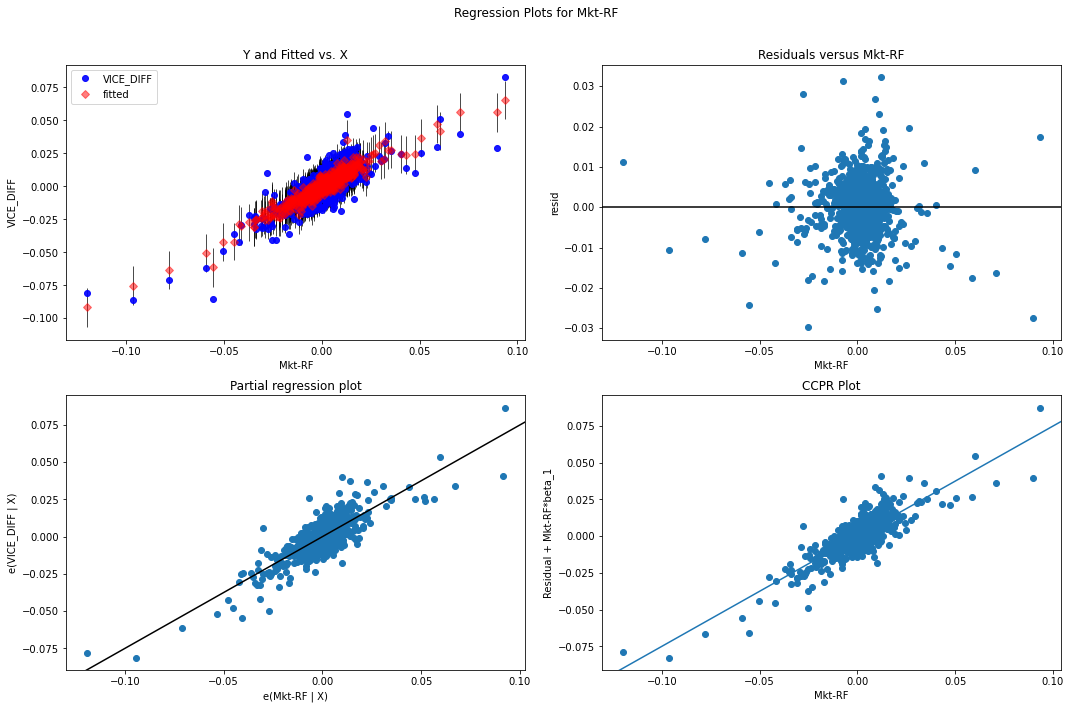

In [239]:
# Plotting residuals VICE vs Mkt_RF
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(est_vice, 'Mkt-RF', fig=fig)

Comments:
* Resid vs Mkt-RF: No particular relationship between actual Mkt-RF and residuals (possible that there is an infinitesimally small negative relationship)
* Partial regression plot: Positive relationship between VICE and Mkt-RF, given all other factors
* CCPR: Positive relationship between VICE and Mkt-RF, given all other factors

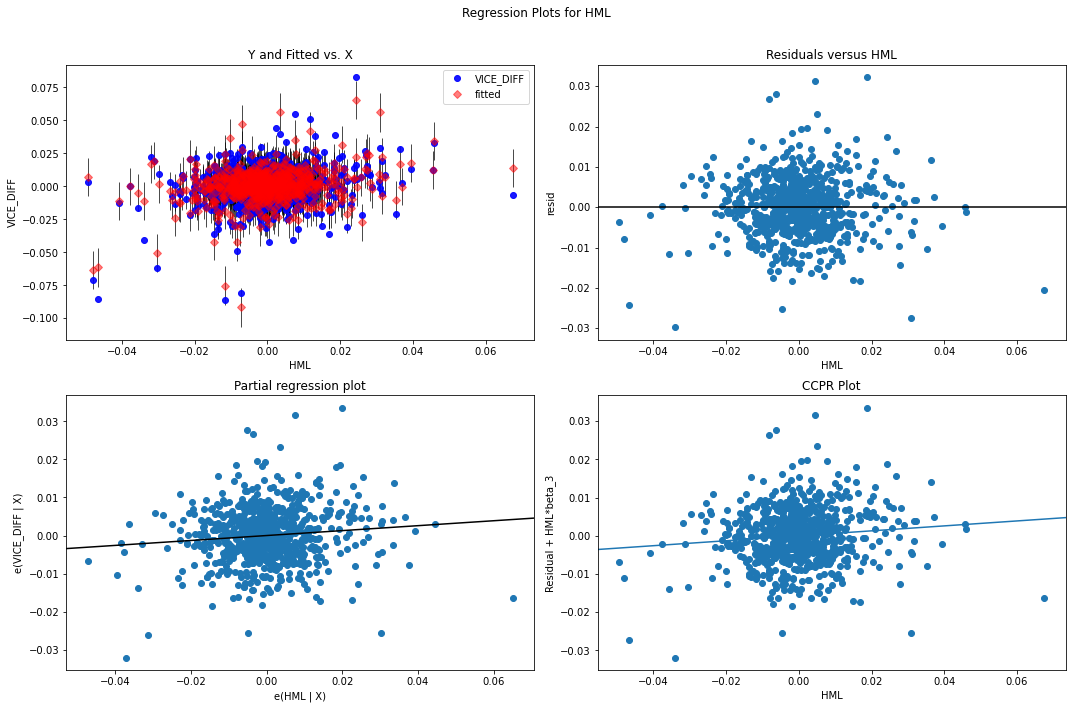

In [243]:
# Plotting residuals VICE vs HML
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(est_vice, 'HML', fig=fig)

Comments:
* Resid vs HML: No particular relationship between actual HML and residuals (possible that there is an infinitesimally small negative relationship)
* Partial regression plot: Positive relationship between VICE and HML, given all other factors
* CCPR: Positive relationship between VICE and HML, given all other factors

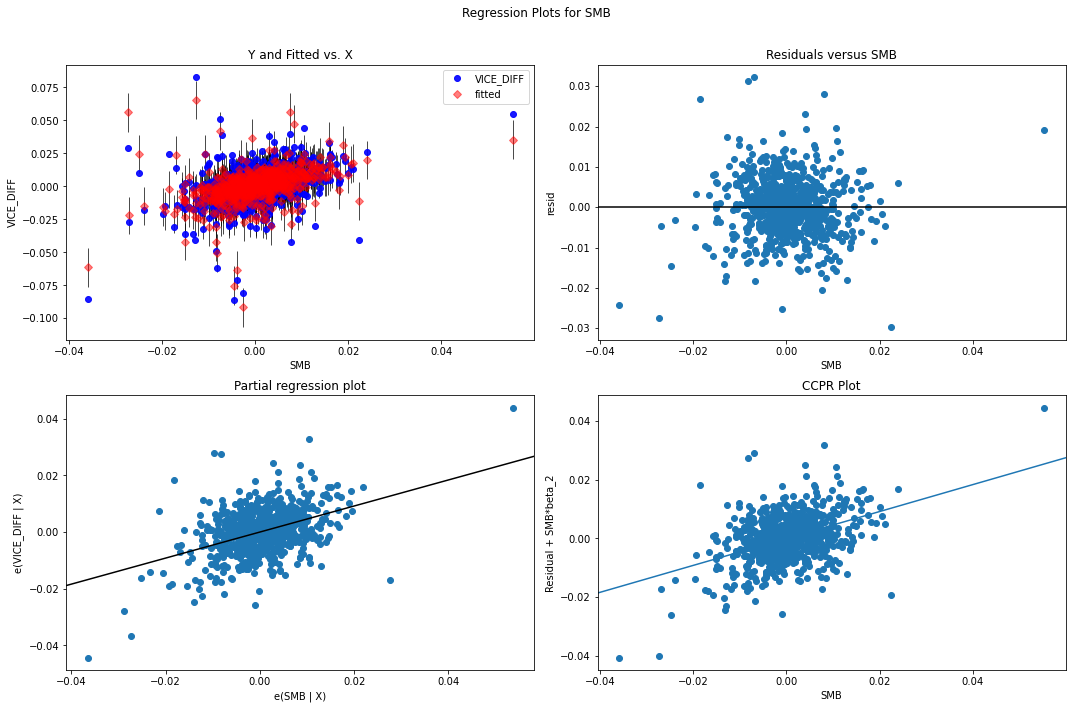

In [244]:
# Plotting residuals VICE vs SMB
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(est_vice, 'SMB', fig=fig)

Comments:
* Resid vs SMB: No particular relationship between actual SMB and residuals (possible that there is an infinitesimally small negative relationship)
* Partial regression plot: Positive relationship between VICE and SMB, given all other factors
* CCPR: Positive relationship between VICE and SMB, given all other factors

#### Heteroscedasticity test
In order to better determine if heteroscedasticity is present in the VICE 3 factor model, White & Breusch Pagan Tests are implemented.

In [242]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_breuschpagan
white_test_vice = het_white(est_vice.resid,est_vice.model.exog)
bp_test_vice = het_breuschpagan(est_vice.resid,est_vice.model.exog)
labels = ['LM Stat','LM Test p-value','F-Stat','F-Test p-value']
print(dict(zip(labels,white_test_vice)))
print(dict(zip(labels,bp_test_vice)))

{'LM Stat': 132.59448678681565, 'LM Test p-value': 3.4693239240795486e-24, 'F-Stat': 17.639277425082977, 'F-Test p-value': 1.1779516120593798e-26}
{'LM Stat': 9.298601342418316, 'LM Test p-value': 0.025573303412295783, 'F-Stat': 3.1215871754706797, 'F-Test p-value': 0.025406558105531395}


The output above shows low p-values for both the BP and White tests, thus providing sufficient evidence to reject the null hypotheses ($H_0$: homoscedasticity, or constant variance of the error term) in favour of the alternative ($H_1$: heteroscedasticity, or variability in the variance of the error term).

The VICE 3 factor model exhibits heteroscedasticity.

### ESGV ETF
#### Heteroscedasticity test

In [246]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_breuschpagan
white_test_esgv = het_white(est_esgv.resid,est_esgv.model.exog)
bp_test_esgv = het_breuschpagan(est_esgv.resid,est_esgv.model.exog)
labels = ['LM Stat','LM Test p-value','F-Stat','F-Test p-value']
print(dict(zip(labels,white_test_esgv)))
print(dict(zip(labels,bp_test_esgv)))

{'LM Stat': 308.2750084613457, 'LM Test p-value': 4.580115777361912e-61, 'F-Stat': 57.17441886793522, 'F-Test p-value': 4.5455697429372703e-79}
{'LM Stat': 11.45833052004517, 'LM Test p-value': 0.009488939733424765, 'F-Stat': 3.8578072420063934, 'F-Test p-value': 0.00933938442587318}


The output above shows low p-values for both the BP and White tests, thus providing sufficient evidence to reject the null hypotheses ($H_0$: homoscedasticity, or constant variance of the error term) in favour of the alternative ($H_1$: heteroscedasticity, or variability in the variance of the error term).

### SSIAX ETF
#### Heteroscedasticity test

In [247]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_breuschpagan
white_test_ssiax = het_white(est_ssiax.resid,est_ssiax.model.exog)
bp_test_ssiax = het_breuschpagan(est_ssiax.resid,est_ssiax.model.exog)
labels = ['LM Stat','LM Test p-value','F-Stat','F-Test p-value']
print(dict(zip(labels,white_test_ssiax)))
print(dict(zip(labels,bp_test_ssiax)))

{'LM Stat': 191.16803777093244, 'LM Test p-value': 2.3448658135767318e-36, 'F-Stat': 28.07805085045729, 'F-Test p-value': 4.220788515064489e-42}
{'LM Stat': 6.372830192075623, 'LM Test p-value': 0.09481496819443158, 'F-Stat': 2.131018791663534, 'F-Test p-value': 0.09492442186172585}


The output above shows low p-values for the White test, thus providing sufficient evidence to reject the null hypotheses ($H_0$: homoscedasticity, or constant variance of the error term) in favour of the alternative ($H_1$: heteroscedasticity, or variability in the variance of the error term).

However, the BP test is only conclusive at the 10% level of significance (null cannot be rejected at lower levels).

### FXAIX ETF
#### Heteroscedasticity test

In [248]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_breuschpagan
white_test_fxaix = het_white(est_fxaix.resid,est_fxaix.model.exog)
bp_test_fxaix = het_breuschpagan(est_fxaix.resid,est_fxaix.model.exog)
labels = ['LM Stat','LM Test p-value','F-Stat','F-Test p-value']
print(dict(zip(labels,white_test_fxaix)))
print(dict(zip(labels,bp_test_fxaix)))

{'LM Stat': 43.53654491917409, 'LM Test p-value': 1.7178440752344405e-06, 'F-Stat': 5.065737049405703, 'F-Test p-value': 1.1628655651626537e-06}
{'LM Stat': 6.429948849640939, 'LM Test p-value': 0.09246646637983379, 'F-Stat': 2.1502830536571653, 'F-Test p-value': 0.09256430256112264}


The output above shows low p-values for the White test, thus providing sufficient evidence to reject the null hypotheses ($H_0$: homoscedasticity, or constant variance of the error term) in favour of the alternative ($H_1$: heteroscedasticity, or variability in the variance of the error term).

However, the BP test is only conclusive at the 10% level of significance (null cannot be rejected at lower levels).

# OVERALL COMMENTS ON THE MODEL ROBUSTNESS (FOR ALL THREE FACTOR MODELS)

Overall, there is evidence to suggest heteroskedasticity within all of the 3 factor models.

There is weak evidence to suggest serial correlation in the models, based on each respective DW statistic provided in the analyses.

Heteroscedasticity should be corrected in the final model.